# Load Dependencies

In [1]:
import talib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Download Some Data

In [2]:
start_ = "2020-01-01"
end_   = "2020-08-01"

df = yf.download(tickers="^GSPC", start=start_, end=end_)


[*********************100%***********************]  1 of 1 completed


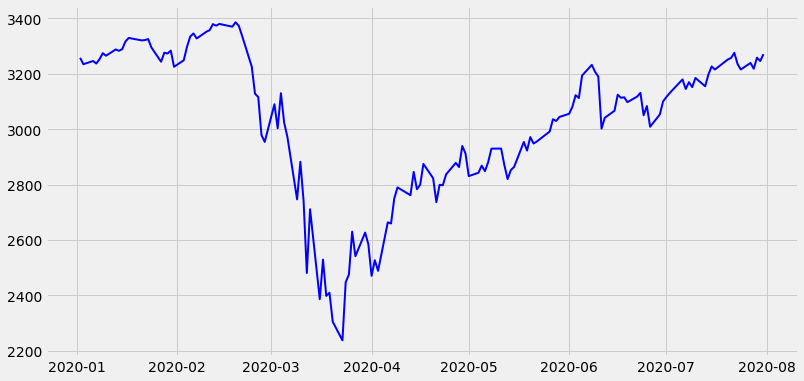

In [3]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df.index.get_level_values(0)

ax.plot(x_axis, df['Adj Close'], color='blue', lw=2);


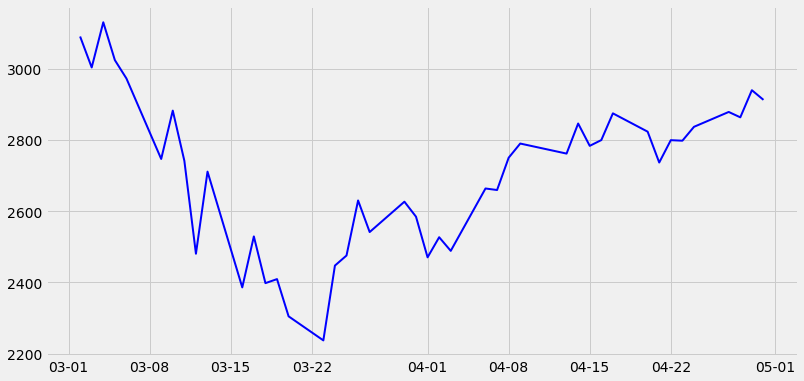

In [4]:
from matplotlib.dates import DateFormatter

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df['2020-Mar-01':'2020-Apr-30'].index.get_level_values(0)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.plot(x_axis, df['2020-Mar-01':'2020-Apr-30']['Adj Close'], color='blue', lw=2);

# CDLMORNINGSTAR - Morning Star

`integer = CDLMORNINGSTAR(open, high, low, close, penetration=0)`

In [5]:
score = talib.CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])

# Returns a lot of ZEROS
print(score)

Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
             ..
2020-07-27    0
2020-07-28    0
2020-07-29    0
2020-07-30    0
2020-07-31    0
Length: 147, dtype: int32


In [6]:
# Filter wherre score not equal to Zero
print(score[score != 0])

Date
2020-03-24    100
dtype: int32


# CDLENGULFING - Engulfing Pattern
`integer = CDLENGULFING(open, high, low, close)`

In [7]:
score = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])

# Returns a lot of ZEROS
print(score)

Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
             ..
2020-07-27    0
2020-07-28    0
2020-07-29    0
2020-07-30    0
2020-07-31    0
Length: 147, dtype: int32


In [8]:
# Filter wherre score not equal to Zero
print(score[score != 0])

Date
2020-01-10   -100
2020-01-15    100
2020-01-24   -100
2020-02-10    100
2020-03-20   -100
2020-04-02    100
2020-05-12   -100
2020-06-19   -100
2020-07-09   -100
2020-07-22    100
dtype: int32


# Update DataFrame

In [9]:
morning_star = talib.CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
engulfing = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])

df['MorningStar'] = morning_star
df['Engulfing'] = engulfing

In [10]:
df[ df['MorningStar'] != 0]

,Open,High,Low,Close,Adj Close,Volume,MorningStar,Engulfing
Date,,,,,,,,
2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7547350000,100,0


In [11]:
is_MornignStar = df['MorningStar'] != 0
is_Engulfing = df['Engulfing'] != 0

df[is_Engulfing | is_MornignStar]


,Open,High,Low,Close,Adj Close,Volume,MorningStar,Engulfing
Date,,,,,,,,
2020-01-10,3281.810059,3282.989990,3260.860107,3265.350098,3265.350098,3212970000,0,-100
2020-01-15,3282.270020,3298.659912,3280.689941,3289.290039,3289.290039,3716840000,0,100
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3707130000,0,-100
2020-02-10,3318.280029,3352.260010,3317.770020,3352.090088,3352.090088,3450350000,0,100
2020-03-20,2431.939941,2453.010010,2295.560059,2304.919922,2304.919922,9044690000,0,-100
2020-03-24,2344.439941,2449.709961,2344.439941,2447.330078,2447.330078,7547350000,100,0
2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000,0,100
2020-05-12,2939.500000,2945.820068,2869.590088,2870.120117,2870.120117,5107710000,0,-100
2020-06-19,3140.290039,3155.530029,3083.110107,3097.739990,3097.739990,8327780000,0,-100


# Use Plotly to dispaly Candlesticks

Needs plotly installed

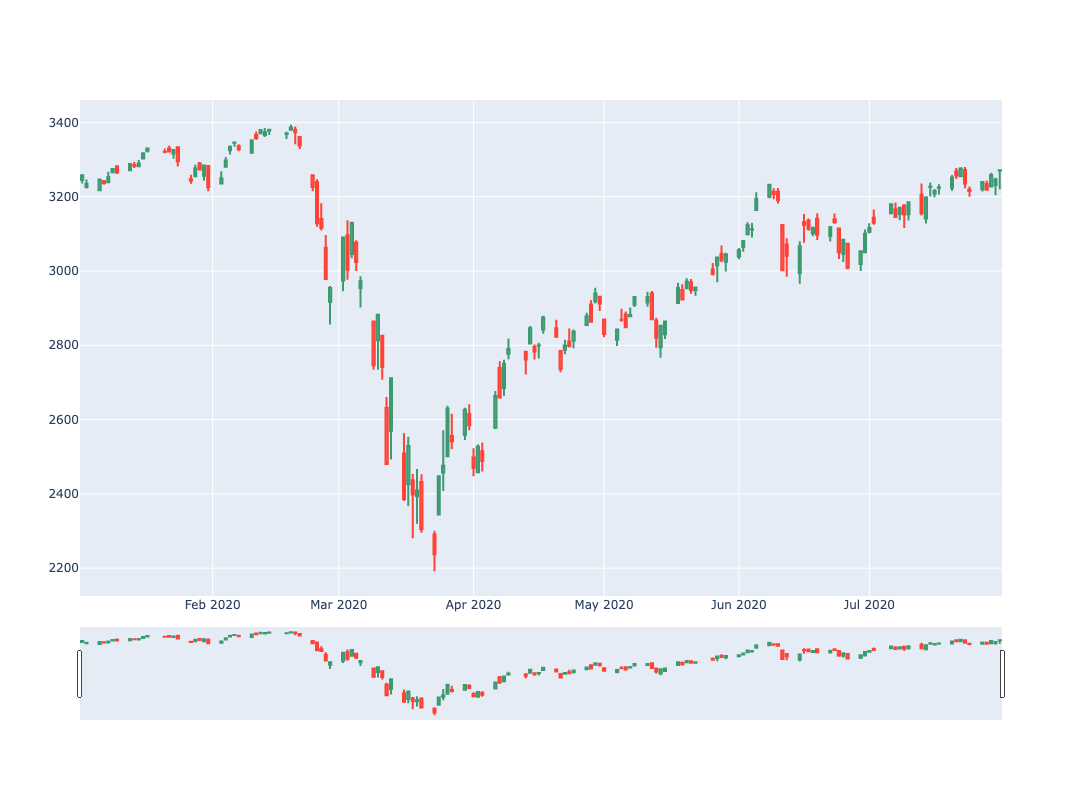

In [12]:
import plotly.graph_objects as go


trace = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Adj Close'])

fig = go.Figure(data=[trace])

fig.update_layout(width=1200,height=800)

fig.show()